In [1]:
import gzip
from collections import Counter
import dictionary_functions as df
import pvml
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

####### Read Files ##########
f=gzip.open("train.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_train=np.array(klass_enc)
t_pub_enc=pub_enc
t_title=title

######## Repeat for Validation and Test Sets #########
####### Read Files ##########
f=gzip.open("validation.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes
pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_val=np.array(klass_enc)
val_pub_enc=pub_enc
val_title=title

####### Read Files ##########
f=gzip.open("test.txt.gz", "rt")
klass=[]
publisher=[]
title=[]
for line in f:
    k, p, t = line.split("|")
    klass.append(k)
    publisher.append(p)
    title.append(t)

####### Encode Classes and Publishers #########
pub=sorted(list(Counter(publisher).keys())) #Get the list of unique publishers
kla=sorted(list(Counter(klass).keys())) #Get the list of unique classes

pub_enc=[]
klass_enc=[]
for p in publisher:
    pub_enc.append(pub.index(p)) #use the publisher index in pub to encode publishers
for k in klass:
    klass_enc.append(kla.index(k)) #use the class index in kla to encode classes

y_test=np.array(klass_enc)
test_pub_enc=pub_enc
test_title=title



######## Create Dictionary #########
size=1000
stem=False
ic=False
dic=df.build_dict(t_title, size, True, stemming=stem, ignore_common=ic)

######## Training Set ######
######## Create BoW ########
bow=df.build_bow(t_title, False, "train_bow", size, stemming=stem)
t_pub_enc=np.array(t_pub_enc)


######## Consolidate Features ########
x_train=np.zeros((len(t_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)
for i in range(len(t_pub_enc)):
    x_train[i][:-1]=bow[i]
    x_train[i][-1]=t_pub_enc[i]

######## Validation Set ####
######## Create BoW ########
bow=df.build_bow(val_title, False, "val_bow", size, stemming=stem)
val_pub_enc=np.array(val_pub_enc)


######## Consolidate Features ########
x_val=np.zeros((len(val_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)
for i in range(len(val_pub_enc)):
    x_val[i][:-1]=bow[i]
    x_val[i][-1]=val_pub_enc[i]

######## Test Set ##########
######## Create BoW ########
bow=df.build_bow(test_title, False, "test_bow", size, stemming=stem)
test_pub_enc=np.array(test_pub_enc)


######## Consolidate Features ########
x_test=np.zeros((len(test_pub_enc), size+1))
#bow=pvml.maxabs_normalization(bow)

for i in range(len(test_pub_enc)):
    x_test[i][:-1]=bow[i]
    x_test[i][-1]=test_pub_enc[i]

    
pub_mat=np.zeros((len(pub), len(kla)))

for i in range(len(y_train)):
    pub_mat[int(x_train[i][-1])][int(y_train[i])]+=1

(19, 4)


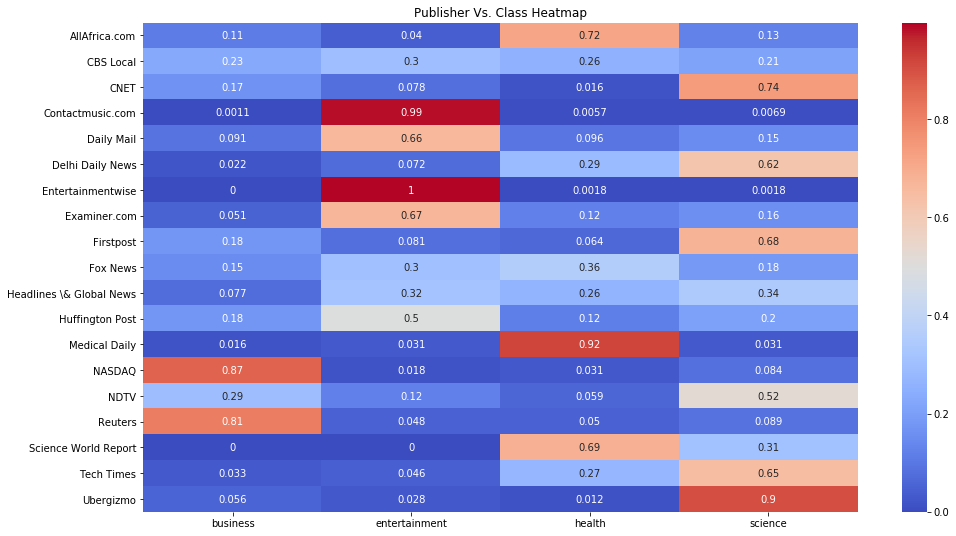

In [2]:
print(pub_mat.shape)
plt.rcParams['figure.figsize'] = 16,9
for i in range(len(pub_mat)):
    pub_mat[i][:]/=pub_mat[i][:].sum()
sn.heatmap(pub_mat, annot=True, cmap="coolwarm")
plt.title("Publisher Vs. Class Heatmap")
plt.xticks(np.linspace(0.5, 3.5, 4),kla)
plt.yticks(np.linspace(0.5,18.5, 19), pub, rotation="horizontal")
plt.show()